In [7]:
import uproot
import awkward as ak
import matplotlib.pyplot as plt
from utils.visualization_utils import plot_tracksters, get_event_window
import numpy as np
%matplotlib inline

# file_name = "new_ntuples_15163313_7.root"
# #file_name = "new_ntuples_15375652_9.root"
# raw_dir = "/eos/cms/store/group/dpg_hgcal/comm_hgcal/wredjeb/TICLv4Sample/CloseBySamples/MultiParticle/ntuples_10_600"
# #raw_dir = "/eos/cms/store/group/dpg_hgcal/comm_hgcal/wredjeb/TICLv4Sample/GNNTraining/SinglePion200PU/ntuples_10_600/"

# file_path = f"{raw_dir}/{file_name}"
# file = uproot.open(file_path)

In [2]:
#filename = "/eos/cms/store/group/dpg_hgcal/comm_hgcal/wredjeb/TICLv4Sample/FlatPt/CloseByGamma0PU/ntuples_10_600/new_ntuples_15043323_86.root"
filename = "/eos/cms/store/group/dpg_hgcal/comm_hgcal/wredjeb/TICLv4Sample/CMSSW_13_X/GNNTraining/CloseByPion0PU/ntuples_10_600/new_ntuples_15643818_42.root"

file = uproot.open(filename)


In [3]:
tracks = file["ticlNtuplizer/tracks"]
tracksters = file["ticlNtuplizer/tracksters"]
simtracksters = file["ticlNtuplizer/simtrackstersSC"]
simtrackstersCP = file["ticlNtuplizer/simtrackstersCP"]
ass = file["ticlNtuplizer/associations"]
gra = file["ticlNtuplizer/graph"]
cand = file["ticlNtuplizer/candidates"]
lc = file["ticlNtuplizer/clusters"]

In [35]:
simtrackstersCP.keys()

['event',
 'NTracksters',
 'time',
 'timeError',
 'regressed_energy',
 'raw_energy',
 'raw_em_energy',
 'raw_pt',
 'raw_em_pt',
 'barycenter_x',
 'barycenter_y',
 'barycenter_z',
 'trackster_barycenter_eta',
 'trackster_barycenter_phi',
 'pdgID',
 'trackTime',
 'boundaryX',
 'boundaryY',
 'boundaryZ',
 'boundaryEta',
 'boundaryPhi',
 'boundaryPx',
 'boundaryPy',
 'boundaryPz',
 'EV1',
 'EV2',
 'EV3',
 'eVector0_x',
 'eVector0_y',
 'eVector0_z',
 'sigmaPCA1',
 'sigmaPCA2',
 'sigmaPCA3',
 'id_probabilities',
 'vertices_indexes',
 'vertices_x',
 'vertices_y',
 'vertices_z',
 'vertices_time',
 'vertices_timeErr',
 'vertices_energy',
 'vertices_correctedEnergy',
 'vertices_correctedEnergyUncertainty',
 'vertices_multiplicity']

In [42]:
trk_data = tracksters.arrays(["NTracksters", "raw_energy","raw_em_energy","barycenter_x","barycenter_y",
                              "barycenter_z","eVector0_x", "eVector0_y","eVector0_z","EV1","EV2","EV3",
                              "vertices_indexes", "sigmaPCA1", "sigmaPCA2", "sigmaPCA3", "vertices_x", "vertices_y",
                              "vertices_z", "vertices_energy", "layer_cluster_seed"])
gra_data = gra.arrays(["linked_inners", "linked_outers"])
#ass_data = ass.arrays(["tsCLUE3D_recoToSim_SC", "tsCLUE3D_recoToSim_SC_score",
                      # "tsCLUE3D_simToReco_SC", "tsCLUE3D_simToReco_SC_score",
                       #"tsCLUE3D_simToReco_SC_sharedE", "tsCLUE3D_recoToSim_SC_sharedE"])

cand_data = cand.arrays(["tracksters_in_candidate"])
lc_data = lc.arrays(['position_x', 'position_y', 'position_z', 'energy'])
try:
    simtrackstersSC_data = simtracksters.arrays(["stsSC_raw_energy", 'stsSC_boundaryPx', 'stsSC_boundaryPy', 'stsSC_boundaryPz'])
    simtrackstersCP_data = simtrackstersCP.arrays(["stsCP_raw_energy", 'stsCP_boundaryPx', 'stsCP_boundaryPy', 'stsCP_boundaryPz'])
    
except Exception:
    simtrackstersSC_data = simtracksters.arrays(["raw_energy", 'boundaryPx', 'boundaryPy', 'boundaryPz'])
    simtrackstersCP_data = simtrackstersCP.arrays(["raw_energy", 'boundaryPx', 'boundaryPy', 'boundaryPz','barycenter_x'])

In [9]:
def check_point_cone(h,base_radius,angle,start_point,x,y,z,eigenvector):
    test_point = np.array([x,y,z])
    base_radius = np.tan(angle)*h
    cone_dist = np.dot(test_point-start_point,eigenvector)
    cone_r = (cone_dist/h)*base_radius
    dist = np.linalg.norm((test_point-start_point)-cone_dist*eigenvector)
    return dist<cone_r

[[0, 5], [0, 4], [0, 6], [0, 7], [0, 8], [2, 5], [2, 6], [2, 7], [2, 8], [3, 6], [3, 7], [3, 8], [4, 7], [4, 8], [5, 7], [5, 8]]


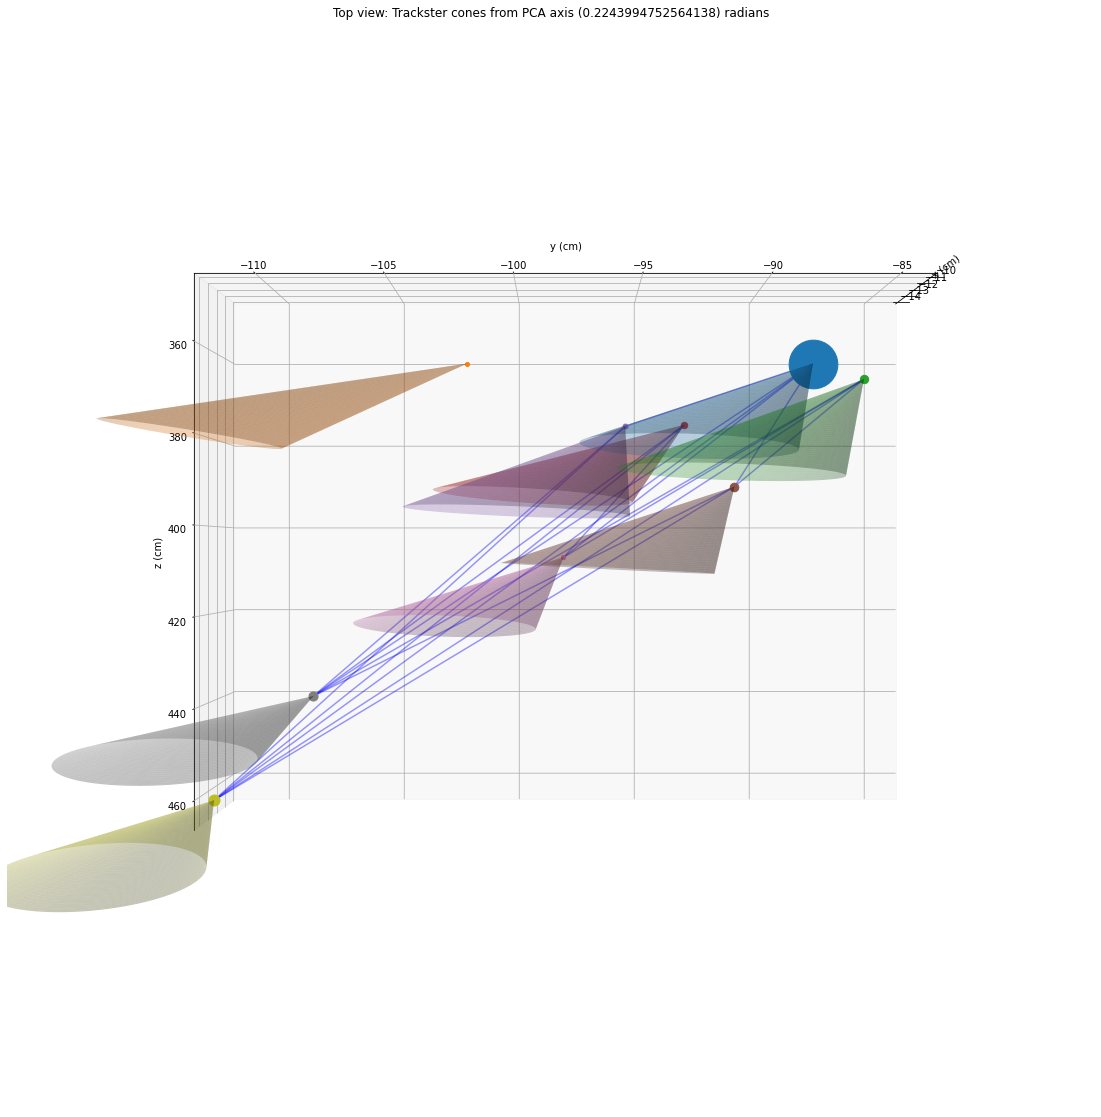

In [27]:
eid = 19
fig = plt.figure(figsize=(20, 20))
ax1 = fig.add_subplot(111, projection='3d')
ax1.set_xlabel("x (cm)")
ax1.set_ylabel("y (cm)")
# ax2 = fig.add_subplot(121, projection='3d')
# ax2.set_xlim(xlim)
# ax2.set_ylim(ylim)
# ax2.set_zlim(zlim)
# ax2.set_xlabel("x (cm)")
# ax2.set_ylabel("y (cm)")
# # ax1.set_zlabel("detector layer")
ax1.set_zlabel("z (cm)")
# ax2.set_zlabel("z (cm)")

# plt.axis('off')
trk_xb = trk_data["barycenter_x"][eid]
trk_yb = trk_data["barycenter_y"][eid]
trk_zb = trk_data["barycenter_z"][eid]
trk_e = trk_data["raw_energy"][eid]
trk_x = trk_data.vertices_x[eid]
trk_y = trk_data.vertices_y[eid]
trk_z = trk_data.vertices_z[eid]
trk_vi = trk_data["vertices_indexes"][eid]
ex = trk_data["eVector0_x"][eid]
ey = trk_data["eVector0_y"][eid]
ez= trk_data["eVector0_z"][eid]
evx = trk_data["EV1"][eid]
evy = trk_data["EV2"][eid]
evz = trk_data["EV3"][eid]
percent = 0.
angle = np.pi/14
trk_r = np.sqrt(trk_data["barycenter_x"][eid]**2+trk_data["barycenter_y"][eid]**2+trk_data["barycenter_z"][eid]**2)
max_r = np.max(trk_r)

points = []
edges = []
for vi_m,(x, y, z, e,eigenvector1,eigenvector2,eigenvector3,vi) in enumerate(zip(trk_xb, trk_yb, trk_zb, trk_e,ex,ey,ez,trk_vi)):
   #height for cone visualization
    h = 20
    #create vertex point 
    start_point = np.array([x,y,z])
    #define direction of trackster barycenter and normalize
    eigenvector = np.array([eigenvector1,eigenvector2,eigenvector3])
    eigenvector /=np.linalg.norm(eigenvector)
    #create arbitrary vector not in same direction as eigenvector in order to create orthogonal vector
    not_ev = np.array([1,0,0])
    if (eigenvector ==not_ev).all():
        not_ev = np.array([0,1,0])
    #create orthogonal vector 1
    ev_cross = np.cross(eigenvector,not_ev)
    #create orthogonal vector 2
    ev_cross/=np.linalg.norm(ev_cross)
    ev_cross2 = np.cross(eigenvector,ev_cross)
    #ev_cross2/=np.linalg.norm(ev_cross)
    #cone_dist = np.dot(test_point-start_point,eigenvector)

    #surface ranges over t from 0 to length of axis and 0 to 2*pi
    
    t = np.linspace(0, h, 100)
    theta = np.linspace(0, 2 * np.pi, 100)
    #use meshgrid to make 2d arrays, generate cone central axis and opening
    line_points = [start_point + t * eigenvector for t in t]
    base_radius = np.tan(angle)*(np.linalg.norm(line_points[-1]-start_point))

    line_points = np.array(line_points)
    cone_dist = np.dot(line_points-start_point,eigenvector)
    R = (cone_dist/h)*base_radius
    t, theta = np.meshgrid(t, theta)
    #search through all tracksters, creating an edge if it exists within cone of main tracksters
    data = [[l,x,y,z,j] for l,(x,y,z,j) in enumerate(zip(trk_xb, trk_yb, trk_zb,trk_vi))]
    ordered_data = sorted(data, key=lambda a: -a[2])
    for vi_n,xp, yp, zp, j in ordered_data:
        if check_point_cone(h,base_radius,angle,start_point,xp,yp,zp,eigenvector):
            edges.append([vi_m,vi_n])
            ax1.plot([xp, x], [yp, y], [zp, z], c='blue', alpha=0.4)
    
    #generate coordinates for surface
    X, Y, Z = [start_point[i] + eigenvector[i] * t + R* np.sin(theta) * ev_cross[i] + R* np.cos(theta) * ev_cross2[i] for i in [0, 1, 2]]
    ax1.plot_surface(X, Y, Z,alpha=.3)
    ax1.scatter(x, y, z, s=20*e)
    #ax2.plot_surface(X, Y, Z,alpha=1)
   # ax2.scatter(x, y, z, s=20*e)

clusters_x = lc["position_x"].array()
clusters_y = lc["position_y"].array()
clusters_z = lc["position_z"].array()
clusters_e = lc["energy"].array()
vi = trk_data.vertices_indexes[eid]
# vi = simtracksters["stsSC_vertices_indexes"].array()[0:eid]

# only take one endcap
vz = ak.Array([clusters_z[eid][indices] for indices in vi])
# tdx = vz > 0

vx = ak.Array([clusters_x[eid][indices] for indices in vi])
vy = ak.Array([clusters_y[eid][indices] for indices in vi])
ve = ak.Array([clusters_e[eid][indices] for indices in vi])

vzm = vz
# vzm = [apply_map(trk, z_map) for trk in vz]
print(edges)
xlim, ylim, zlim = get_event_window(vx, vy, vzm, ve)
ax1.set_xlim(xlim)
ax1.set_ylim(ylim)
ax1.set_zlim(zlim)
ax1.set_title(f"Top view: Trackster cones from PCA axis ({angle}) radians")
ax1.view_init(0,180)
#ax2.set_title(f"Front view: Trackster cones from PCA axis ({angle}) radians")
#ax2.view_init(0, 90)
plt.show()
ax1.get_yaxis().set_ticks([])
ax1.get_yaxis().set_visible(False)

In [ ]:
# Validation score between every "super trackster" and simtrackster
# a trackster is "in" it's best matched simtrackster
# Calculated as intersection / union; 1 = perfect match
# Intersection = sum(Energy of tracksters common)
# for every "super trackster" consider only the best score

    
#@jit
def scores_reco_to_sim(predicted_clusters, truth_cluster_labels, truth_cluster_energies, E):
    num_truth_clusters = int(max(truth_cluster_labels)+1)
    pred_cluster_energies = []
    reco_sim_scores = []
    best_sim_matches = []
    
    for pred_cluster in predicted_clusters:
        # for each predicted cluster, one score for every truth cluster
        scores_cluster = np.zeros(num_truth_clusters) # [0 for i in range(num_truth_clusters)]
        clusterE = 0
        for trackster in pred_cluster:
            truth_label = int(truth_cluster_labels[trackster])
            scores_cluster[truth_label] += E[trackster]
            clusterE += E[trackster]
        pred_cluster_energies.append(clusterE)
        
        for cluster in range(num_truth_clusters):
            scores_cluster[cluster] /= (pred_cluster_energies[-1] + truth_cluster_energies[cluster] - scores_cluster[cluster])
        reco_sim_scores.append(np.max(scores_cluster))
        best_sim_matches.append(np.argmax(scores_cluster))
        
    return reco_sim_scores, best_sim_matches, pred_cluster_energies


truth_cluster_energies = []
for t_cluster in truth_clusters:
    clusterE = 0
    for t in t_cluster:
        clusterE += E[t]
    truth_cluster_energies.append(clusterE)

# Only Network
reco_sim_scores, best_sim_matches, pred_cluster_energies = scores_reco_to_sim(nn_predicted_clusters, truth_cluster_labels, truth_cluster_energies, E)

print(f"RECO-SIM scores : {reco_sim_scores}")
print(f"Best SIM matches : {best_sim_matches}")